In [1]:
import sys
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import balanced_accuracy_score, accuracy_score, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.svm import SVC

sys.path.append("../../")

from helpers.split import tag_label_feature_split
from helpers.assess import make_classification_report, make_confusion_matrix

DATASET_FOLDER = "../../datasets/"

In [2]:
# read a data set
dataset="dataset_00_all.pickle"
df = pd.read_pickle(DATASET_FOLDER + dataset)

In [3]:
# get labels, a label encoder and features
_, (y, le), X = tag_label_feature_split(df, label_format="encoded")

In [4]:
# undersample to create balanced dataset
rus = RandomUnderSampler(random_state=1962)
X_res, y_res = rus.fit_resample(X, y)

In [5]:
# confirm the number of samples of each class
np.unique(y_res, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([361, 361, 361, 361, 361, 361, 361, 361, 361, 361]))

In [6]:
# split into train/validation and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, shuffle=True, stratify=y_res, random_state=1962
)

In [7]:
# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
param_grid = [
  {'C': [1, 10, 100, 1000],
   'gamma': [0.001, 0.0001],
   'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
   'random_state': [1962]
  }]

classifier = GridSearchCV(SVC(), param_grid, scoring='matthews_corrcoef', n_jobs=-1, verbose=4)
classifier.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'random_state': [1962]}],
             scoring='matthews_corrcoef', verbose=4)

In [9]:
classifier.best_score_

0.5851200080477099

In [10]:
classifier.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 1962}

In [11]:
predictions=classifier.predict(X_test_scaled)

In [12]:
classifier.score(X_test_scaled, y_test)

0.5957786331121695

In [13]:
balanced_accuracy_score(y_test, predictions)

0.6362442922374429

In [14]:
matthews_corrcoef(y_test, predictions)

0.5957786331121695

In [16]:
make_classification_report(
    y_true=y_test,
    y_pred=predictions,
    model=classifier,
    x = X_test_scaled,
    label_encoder=le,
    print_report=True
)
pass

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.53    0.50      0.51       72  0.46
  genre_classical       0.70    0.83      0.76       72  0.73
    genre_country       0.70    0.59      0.64       73  0.61
      genre_disco       0.71    0.76      0.73       72  0.70
     genre_hiphop       0.73    0.62      0.67       72  0.64
       genre_jazz       0.54    0.61      0.58       72  0.53
      genre_metal       0.74    0.82      0.78       72  0.75
        genre_pop       0.38    0.32      0.34       73  0.28
     genre_reggae       0.74    0.76      0.75       72  0.73
       genre_rock       0.55    0.54      0.55       72  0.50
                                                             
         accuracy                         0.64      722  0.60
        macro avg       0.63    0.64      0.63      722      
     weighted avg       0.63    0.64      0.63      722      
        

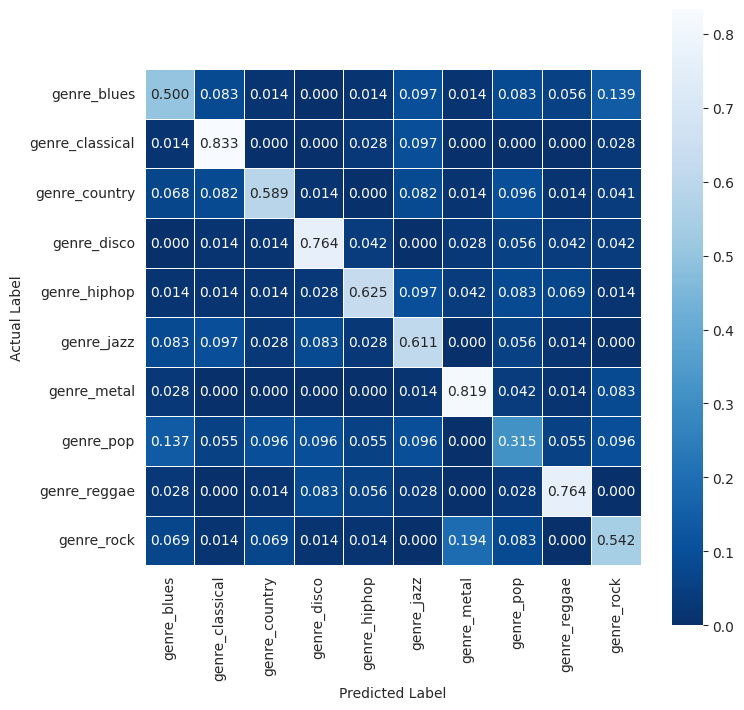

In [18]:
make_confusion_matrix(
    y_true=y_test,
    y_pred=predictions,
    model=classifier,
    x = X_test_scaled,
    normalize="true",  
    autoweight_sample=True,  
    label_encoder=le,  
    figsize=(8, 8),  
)
pass

**Use Class Weight Parameter Instead of Under Sampling**